In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [7]:
# Load from GroupLens
ratings_url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.data"
movies_url = "https://files.grouplens.org/datasets/movielens/ml-100k/u.item"

# Load ratings
ratings = pd.read_csv(ratings_url, sep='\t', names=["user_id", "movie_id", "rating", "timestamp"])

# Load movies
movies = pd.read_csv(movies_url, sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=["movie_id", "title"])

# Merge
df = ratings.merge(movies, on="movie_id")
df.head()

,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [8]:
user_item_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [9]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


In [10]:
def recommend_movies(user_id, user_item_matrix, similarity_matrix, n=5):
    user_ratings = user_item_matrix.loc[user_id]
    similar_users = similarity_matrix[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)

    weighted_ratings = np.zeros(user_item_matrix.shape[1])
    sim_sums = np.zeros(user_item_matrix.shape[1])

    for sim_user_id, similarity in similar_users.items():
        sim_user_ratings = user_item_matrix.loc[sim_user_id]
        rated = sim_user_ratings > 0

        weighted_ratings += similarity * sim_user_ratings
        sim_sums += similarity * rated

    predicted_ratings = weighted_ratings / (sim_sums + 1e-10)
    already_rated = user_ratings > 0
    predicted_ratings[already_rated.values] = 0

    top_indices = np.argsort(predicted_ratings)[::-1][:n]
    recommended_movies = user_item_matrix.columns[top_indices]

    print(f"Top {n} movie recommendations for User {user_id}:\n")
    for movie in recommended_movies:
        print(movie)

In [11]:
recommend_movies(user_id=1, user_item_matrix=user_item_matrix, similarity_matrix=user_similarity_df, n=5)

Top 5 movie recommendations for User 1:

Prefontaine (1997)
Saint of Fort Washington, The (1993)
Santa with Muscles (1996)
Great Day in Harlem, A (1994)
Someone Else's America (1995)


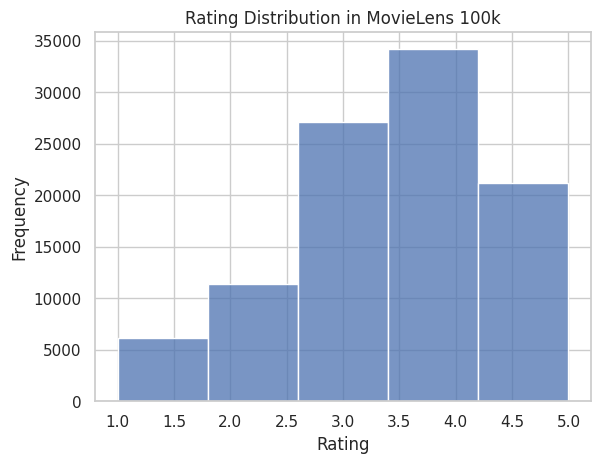

In [12]:
sns.histplot(df["rating"], bins=5)
plt.title("Rating Distribution in MovieLens 100k")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()